In [51]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Read Data
* Data Descriptions: https://www.kaggle.com/c/titanic/data

In [52]:
# 본인의 환경에 맞게 경로 설정 해주세요.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,949,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.65,F G63,S


## Check null values

In [55]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# EDA

In [61]:
# 어떤 feature가 Survived 컬럼을 유의미하게 설명하는지 분석해보세요.

In [57]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


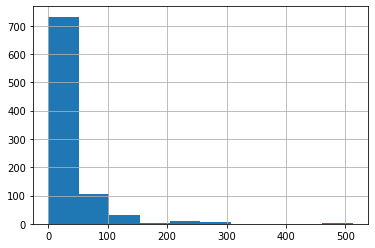

In [58]:
train['Fare'].hist()

# Concat Data

In [59]:
train_except_Survived = train.drop('Survived', axis=1)

In [60]:
train_except_Survived['tag'] = 'train'
test['tag'] = 'test'

In [61]:
df = pd.concat([train_except_Survived, test])

In [62]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [63]:
dummies =  pd.get_dummies(df['Sex'])

In [64]:
df = pd.concat([df, dummies], axis = 1)

In [65]:
df["Embarked_C"] = df["Embarked"] == "C"
df["Embarked_S"] = df["Embarked"] == "S"
df["Embarked_Q"] = df["Embarked"] == "Q"

print(df.shape)
df[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(1309, 17)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,S,False,True,False
1,C,True,False,False
2,S,False,True,False
3,S,False,True,False
4,S,False,True,False


In [85]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
tag               0
female            0
male              0
Embarked_C        0
Embarked_S        0
Embarked_Q        0
TravelAlone       0
FamilySize        0
dtype: int64

In [67]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [68]:
df['Embarked'] = df['Embarked'].fillna('S')

In [69]:
df['Fare'] = df['Fare'].fillna('7.2500')

In [70]:
df['TravelAlone']=np.where((df["SibSp"]+df["Parch"])>0, 0, 1)

In [71]:
df['FamilySize'] = df["SibSp"]+df["Parch"]+1

In [74]:
df["Age"].fillna(df["Age"].median(skipna=True), inplace=True)

In [84]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag,female,male,Embarked_C,Embarked_S,Embarked_Q,TravelAlone,FamilySize
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,train,0,1,False,True,False,0,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,1,0,True,False,False,0,2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,train,1,0,False,True,False,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,train,1,0,False,True,False,0,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,train,0,1,False,True,False,1,1


# Feature Engineering

# Make dataset for model fitting

In [76]:
# choose independent variables(Xs) which are useful!
# 트레이닝에 사용할 변수 목록을 적어주세요.
independents = ['Pclass']   # 독립변수
dependent = ['Survived']    # 종속변수

In [77]:
#혼자 여행 -0.20211154
independents = ['Pclass', 'TravelAlone', 'female', 'Fare']  
dependent = ['Survived']

In [86]:
# 가장 높은 점수
independents = ["Pclass", "female", "Fare","Embarked_C", "Embarked_Q", "Embarked_S"]  
dependent = ['Survived']

In [113]:
# 가족 사이즈 0.00501804
independents = ['FamilySize']  
dependent = ['Survived']

In [87]:
# 적어준 변수 목록을 사용해 데이터를 트레이닝에 맞는 포맷으로 변경합니다.
train_X = df[df['tag'] == 'train'][independents]
train_y = train[dependent]

test_X = df[df['tag'] == 'test'][independents]

In [88]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
seed = 42
model = DecisionTreeClassifier(max_depth=5,
                               random_state=seed)
model.fit(train_X, train_y)

tree = tree.fit(train_X, train_y)
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [89]:
tree.feature_importances_

array([0.11360038, 0.40475529, 0.44415004, 0.01829767, 0.00521766,
       0.01397896])

In [90]:
predict_tree = tree.predict(test_X)

In [91]:
predict_tree

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [92]:
forest = RandomForestClassifier(random_state=42, n_estimators=10)

In [93]:
forest = forest.fit(train_X, train_y)
forest

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [94]:
predict_forest = forest.predict(test_X)

In [95]:
predict_forest

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Model fitting

In [152]:
# 학습 fit()
reg = LinearRegression().fit(train_X, train_y)

In [153]:
# x 계수
# x 계수의 의미를 해석하세요.
reg.coef_

array([[-0.15724745, -0.01387149,  0.51253668]])

In [154]:
# 절편
reg.intercept_

array([0.5746021])

In [155]:
reg.score(train_X, train_y, sample_weight=None)

0.3678552677462398

# Prediction

In [156]:
prediction = reg.predict(test_X)

In [157]:
# 회귀 예측 결과를 classification으로 바꿔주기
# 여기에서는 회귀 예측 결과가 0.5 이상일 때에는 1, 그렇지 않으면 0으로 바꿔줬습니다.
prediction_binomial = [1 if p>=0.5 else 0 for p in prediction]

In [158]:
ddf = pd.DataFrame({'prediction': [p[0] for p in prediction],
                   'prediction_binomial': prediction_binomial})

In [159]:
ddf.sample()

,prediction,prediction_binomial
141,0.91602,1


# Submission

In [160]:
submission = pd.read_csv('gender_submission.csv')

In [ ]:
submission['Survived'] = ddf['prediction_binomial']

In [96]:
submission['Survived'] = predict_forest

In [98]:
submission.to_csv('submission_baseline.csv', index=False)

# Rules
* 주어진 시간을 준수해주세요. Kaggle 제출과 채점까지 마친 상태여야 합니다.
* 모방은 창조의 어머니! 먼저 데이터를 분석해본 분석가들의 노트북을 보고 따라하세요.
* 새롭게 배우게 된 지식을 동료와 공유하세요.

# Hint
1. Logistic Regression으로도 풀어보세요. (이외에 다른 모델 사용 가능)
2. null 값이 있는 컬럼을 사용한다면, 현명하게 채워보세요.
3. Sex 컬럼을 regression에 넣을 수 있는 형태로 변형하세요.
4. 기존 데이터를 사용해 새로운 의미있는 변수를 만들어보세요. (캐글에 다른 노트북들을 참고하세요.)
    ### 참고해볼만한 노트북:
    * https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic
    * https://www.kaggle.com/ash316/eda-to-prediction-dietanic

# 로지스틱 회귀?
* https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/
* https://ratsgo.github.io/machine%20learning/2017/07/02/logistic/